In [1]:
## import libraries
import seaborn as sns
from pathlib import Path
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#current directory
print(f"Current directory: {Path.cwd()}")
print(f"Home directory: {Path.home()}")

Current directory: /Users/anna/Documents/PhD/CalcificationImaging
Home directory: /Users/anna


In [3]:
##import dataframe

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/INS3001_03/20x_tiff/")#direct to image dir
img_dir = Path('')

exp=str(list(img_dir.glob('C3*'))[0]) #get experimental code
exp_num=exp.split('-')[1][:-9]

featuresScaled_df = pd.read_excel ('medianFeaturesScaled_20200301_CaP_INS3001_Exp03_20x.xlsx')#read in df
featuresScaled_df.head()

,cond,nuclei_count,ethd_count,areas,major_axis_length,eccentricity,eulernumber,extent,maxint,meanint,...,energy_cm,correlation_cm,homogeneity_cm,contrast_calcein,dissimilarity_calcein,ASM_calcein,energy_calcein,correlation_calcein,homogeneity_calcein,cond_short
0,c00_w1_01.tif,0.197880,0.508197,0.648722,0.645879,0.065991,0,0.611730,0.327103,0.193426,...,0.599925,0.350208,0.571316,0.472404,0.598390,0.055419,0.144814,0.837211,0.230738,c00
1,c00_w1_02.tif,0.300353,0.770492,0.505347,0.510683,0.000000,0,1.000000,0.485981,0.332935,...,0.377696,0.279622,0.336020,0.948011,0.943293,0.009941,0.032925,0.799383,0.056176,c00
2,c00_w1_03.tif,0.261484,0.573770,0.533261,0.598505,0.217366,0,0.637159,0.411215,0.294238,...,0.365010,0.432470,0.328747,0.928269,0.986408,0.001332,0.004730,0.825083,0.000000,c00
3,c00_w2_01.tif,0.155477,1.000000,0.688236,0.719803,0.093427,0,0.878213,1.000000,1.000000,...,0.000000,0.481072,0.000000,1.000000,1.000000,0.000000,0.000000,0.802495,0.017201,c00
4,c00_w2_02.tif,0.000000,0.950820,1.000000,1.000000,0.063125,0,0.953595,0.976636,0.793489,...,0.067373,0.462349,0.123097,0.797720,0.860634,0.017662,0.055503,0.762086,0.083462,c00


In [4]:
exp_num

'20200301_CaP_INS3001_Exp03'

## dependending on experiment - map condition code to actual condition

In [114]:
##CaP range map experimental groups to cond.code

groups={'c00':'1/1','c01':'2/2','c02':'2/5','c03':'5/7','c04':'7/7'}#adapt according to exp
featuresScaled_df['cond_name']=featuresScaled_df['cond_short'].map(groups)
featuresScaled_df.head()

,cond,nuclei_count,ethd_count,areas,major_axis_length,eccentricity,eulernumber,extent,maxint,meanint,...,correlation_cm,homogeneity_cm,contrast_calcein,dissimilarity_calcein,ASM_calcein,energy_calcein,correlation_calcein,homogeneity_calcein,cond_short,cond_name
0,20x_c00_w1_01.tif,0.669516,0.000000,0.231800,0.241722,0.483298,0,0.623440,0.413265,0.591993,...,0.000000,0.290884,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,c00,1/1
1,20x_c00_w1_02.tif,0.740741,0.000000,0.152009,0.300203,0.509702,0,0.781002,0.362245,0.558363,...,0.192307,0.287729,0.000004,0.000143,0.982707,0.990295,0.049719,0.998150,c00,1/1
2,20x_c00_w1_03.tif,0.837607,0.021277,0.080373,0.143876,0.462305,0,1.000000,0.280612,0.522623,...,0.239713,0.432967,0.000024,0.000558,0.970493,0.983390,0.035917,0.993617,c00,1/1
3,20x_c00_w2_01.tif,0.643875,0.063830,0.162784,0.189539,0.457183,0,0.347137,0.270408,0.471573,...,0.366882,0.362252,0.000015,0.000376,0.977047,0.987101,0.024935,0.995619,c00,1/1
4,20x_c00_w2_02.tif,1.000000,0.042553,0.000000,0.043053,0.620487,0,0.642118,0.234694,0.432813,...,0.563216,0.384523,0.000025,0.000558,0.956268,0.975294,0.054167,0.993716,c00,1/1


In [5]:
##INS3001 map experimental groups to cond.code

groups={'c00':'pos.ctrl','c01':'6 \u03BCM','c02':'13 \u03BCM','c03':'25 \u03BCM','c04':'50 \u03BCM','neg':'neg.ctrl'}#adapt according to exp
featuresScaled_df['cond_name']=featuresScaled_df['cond_short'].map(groups)
featuresScaled_df

,cond,nuclei_count,ethd_count,areas,major_axis_length,eccentricity,eulernumber,extent,maxint,meanint,...,correlation_cm,homogeneity_cm,contrast_calcein,dissimilarity_calcein,ASM_calcein,energy_calcein,correlation_calcein,homogeneity_calcein,cond_short,cond_name
0,c00_w1_01.tif,0.197880,0.508197,0.648722,0.645879,0.065991,0,0.611730,0.327103,0.193426,...,0.350208,0.571316,0.472404,0.598390,0.055419,0.144814,0.837211,0.230738,c00,pos.ctrl
1,c00_w1_02.tif,0.300353,0.770492,0.505347,0.510683,0.000000,0,1.000000,0.485981,0.332935,...,0.279622,0.336020,0.948011,0.943293,0.009941,0.032925,0.799383,0.056176,c00,pos.ctrl
2,c00_w1_03.tif,0.261484,0.573770,0.533261,0.598505,0.217366,0,0.637159,0.411215,0.294238,...,0.432470,0.328747,0.928269,0.986408,0.001332,0.004730,0.825083,0.000000,c00,pos.ctrl
3,c00_w2_01.tif,0.155477,1.000000,0.688236,0.719803,0.093427,0,0.878213,1.000000,1.000000,...,0.481072,0.000000,1.000000,1.000000,0.000000,0.000000,0.802495,0.017201,c00,pos.ctrl
4,c00_w2_02.tif,0.000000,0.950820,1.000000,1.000000,0.063125,0,0.953595,0.976636,0.793489,...,0.462349,0.123097,0.797720,0.860634,0.017662,0.055503,0.762086,0.083462,c00,pos.ctrl
5,c00_w2_03.tif,0.079505,0.737705,0.812036,0.933634,0.407887,0,0.526533,0.626168,0.784683,...,0.640113,0.152335,0.307187,0.543611,0.021675,0.066462,0.853595,0.131838,c00,pos.ctrl
6,c00_w3_01.tif,0.295053,0.442623,0.441907,0.615838,0.714424,0,0.371436,0.467290,0.770140,...,0.736108,0.166618,0.232829,0.471657,0.016194,0.051370,0.894547,0.141311,c00,pos.ctrl
7,c00_w3_02.tif,0.342756,0.442623,0.385354,0.592328,0.879627,0,0.024524,0.551402,0.855966,...,0.631414,0.037014,0.311916,0.530166,0.028827,0.084920,0.899525,0.154562,c00,pos.ctrl
8,c00_w3_03.tif,0.106007,0.426230,0.770709,0.898250,0.477242,0,0.339745,0.579439,0.595263,...,0.215410,0.231378,0.373789,0.501957,0.079967,0.191913,0.766003,0.306833,c00,pos.ctrl
9,c01_w1_01.tif,0.462898,0.508197,0.315751,0.431829,0.551383,0,0.590153,0.252336,0.192982,...,0.642960,0.516541,0.108201,0.181648,0.128919,0.271785,0.934874,0.523218,c01,6 μM


# visualization of single experiments

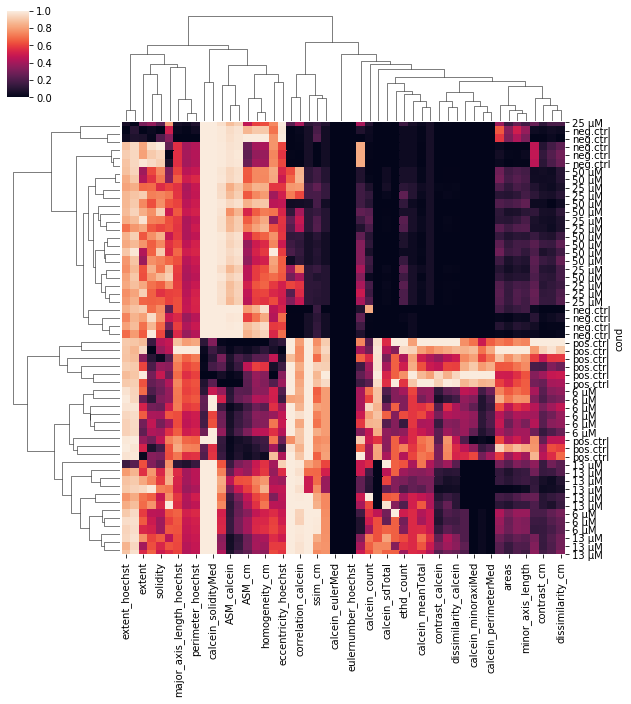

In [6]:
## visualize feature clustering v1
rcGraph = {"axes.spines.left" : True,
      "axes.spines.right" : True,
      "axes.spines.bottom" : True,
      "axes.spines.top" : True,
      "xtick.bottom" : True,
      "xtick.labelbottom" : True,
      "ytick.labelleft" : True,
      "ytick.left" : True}
plt.rcParams.update(rcGraph)
featuresScaled_df.set_index('cond',inplace=True)
fig=sns.clustermap(featuresScaled_df.drop(['minor_axis_length_hoechst','bbox_hoechst','cond_short','cond_name'],axis=1), 
                   yticklabels= featuresScaled_df['cond_name'])

#plt.savefig('clustermap_v1_{}.png'.format(exp_num),bbox_inches="tight")

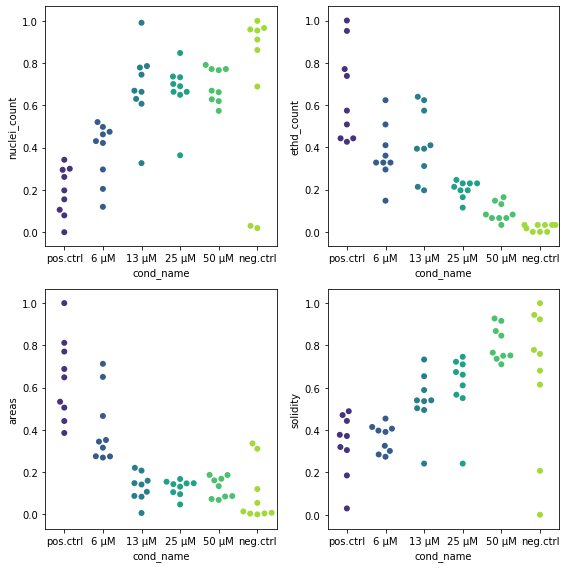

In [11]:

##visualize primary features: count, dead cell count, single cell area, solidity - cellular changes
plt.rcParams.update(rcGraph)

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(8,8))
sns.swarmplot(y="nuclei_count", x="cond_name", 
                 data=featuresScaled_df,ax=ax1,palette='viridis',size=6)
sns.swarmplot(y="ethd_count",x="cond_name",data=featuresScaled_df, color='gray',palette='viridis',ax=ax2,size=6)
sns.swarmplot(y="areas", x="cond_name", data=featuresScaled_df,color='gray',palette='viridis',ax=ax3,size=6)
sns.swarmplot(y="solidity", x="cond_name",data=featuresScaled_df,color='gray',palette='viridis',ax=ax4,size=6)
fig.tight_layout()
plt.savefig('primaryFeatures_v1_{}.png'.format(exp_num),bbox_inches="tight")

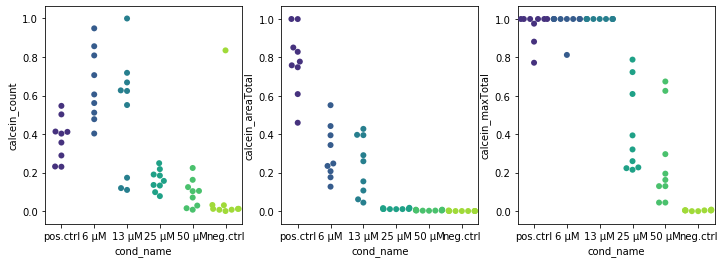

In [9]:
#visualize calcein features - area, number, intensity
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4))
sns.swarmplot(y="calcein_count", x="cond_name", 
                 data=featuresScaled_df,ax=ax1,palette='viridis',size=6)
sns.swarmplot(y="calcein_areaTotal",x="cond_name",data=featuresScaled_df, color='gray',palette='viridis',ax=ax2,size=6)
sns.swarmplot(y="calcein_maxTotal", x="cond_name", data=featuresScaled_df,color='gray',palette='viridis',ax=ax3,size=6)


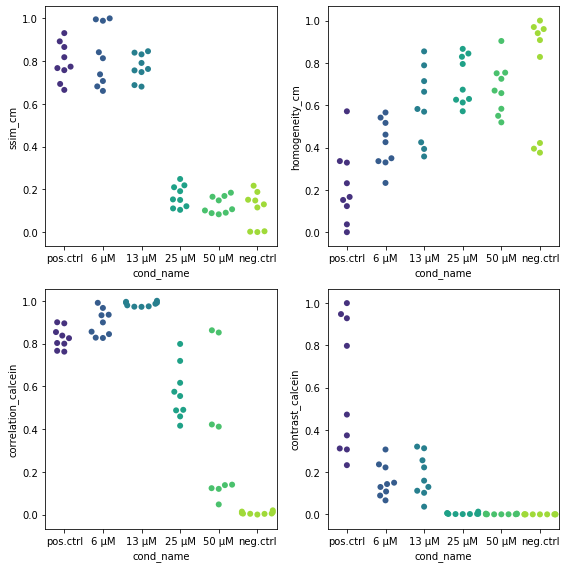

In [12]:
##visualize patch features: correlation cm-calcein, texture features of calcein and cellmask

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(8,8))
sns.swarmplot(y="ssim_cm", x="cond_name", 
                 data=featuresScaled_df,ax=ax1,palette='viridis',size=6)
sns.swarmplot(y="homogeneity_cm",x="cond_name",data=featuresScaled_df, color='gray',palette='viridis',ax=ax2,size=6)
sns.swarmplot(y="correlation_calcein", x="cond_name", data=featuresScaled_df,color='gray',palette='viridis',ax=ax3,size=6)
sns.swarmplot(y="contrast_calcein", x="cond_name",data=featuresScaled_df,color='gray',palette='viridis',ax=ax4,size=6)
fig.tight_layout()
plt.savefig('textureFeatures_v1_{}.png'.format(exp_num),bbox_inches="tight")

# prepare mean/condition feature table to export

In [141]:
## mean/cond for single experiment

featuresScaled_mean=featuresScaled_df.groupby('cond_name').mean()
featuresScaled_mean.to_excel('FeaturesScaled_Mean_exp{}.xlsx'.format('INS3001_03'))

In [123]:
featuresScaled_mean.head()

,nuclei_count,ethd_count,areas,major_axis_length,eccentricity,eulernumber,extent,maxint,meanint,minint,...,ASM_cm,energy_cm,correlation_cm,homogeneity_cm,contrast_calcein,dissimilarity_calcein,ASM_calcein,energy_calcein,correlation_calcein,homogeneity_calcein
cond_name,,,,,,,,,,,,,,,,,,,,,
13 μM,0.401567,0.339286,0.391120,0.508977,0.667000,0,0.316210,0.437500,0.577244,0.606838,...,0.213742,0.314977,0.563721,0.353097,0.188440,0.174289,0.282756,0.471397,0.865724,0.660111
25 μM,0.803958,0.045635,0.068384,0.091166,0.438815,0,0.708821,0.217172,0.341854,0.427350,...,0.406184,0.532531,0.337595,0.601830,0.001641,0.003362,0.893834,0.940645,0.181787,0.981749
50 μM,0.640486,0.019841,0.185799,0.244373,0.665418,0,0.563047,0.219697,0.390026,0.504274,...,0.431588,0.545356,0.337515,0.594796,0.000068,0.000700,0.965352,0.980973,0.026597,0.995159
6 μM,0.469594,0.267857,0.321669,0.371827,0.481556,0,0.404536,0.474747,0.552212,0.529915,...,0.182204,0.274667,0.367330,0.265078,0.298556,0.444574,0.066635,0.193891,0.835003,0.294455
neg.ctrl,0.810555,0.025794,0.063009,0.082089,0.521153,0,0.573536,0.167298,0.334811,0.470085,...,0.520663,0.609057,0.405731,0.655374,0.000085,0.000919,0.957570,0.976596,0.022456,0.993599


# triplicate results

In [19]:
##triplicate results: import mean feature df for all 3 experiments and combine to one df

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/CaPConcRange01/20x_tiff/")#direct to image dir
meanFeature_exp01 = pd.read_excel ('FeaturesScaled_Mean_expCaPrange01.xlsx')#read in df

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/CaPConcRange02/20x_tiff/")#direct to image dir
meanFeature_exp02 = pd.read_excel ('FeaturesScaled_Mean_expCaPrange02.xlsx')#read in df

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/CaPConcRange03/20x_tiff/")#direct to image dir
meanFeature_exp03 = pd.read_excel ('FeaturesScaled_Mean_expCaPrange03.xlsx')#read in df

meanFeature_triplicate=pd.concat([meanFeature_exp01,meanFeature_exp02,meanFeature_exp03])
os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/TriplicateResults/")
meanFeature_triplicate.to_excel('meanFeatures_{}.xlsx'.format('CaP'))

# format features-add colorimetric data

In [54]:
#read in calcium colorimetric data
os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/TriplicateResults/")
calciumQuant=pd.read_excel ('CaPrange_calciumQuant_triplicate.xlsx')#read in df with colorimetric calcium quantification
meanFeature_triplicate=''

##INS-3001
#meanFeature_triplicate=pd.read_excel('meanFeatures_INS3001.xlsx')
#meanFeature_triplicate['calcium normalized']=calciumQuant['calcium (normalized to pos.ctrl)']
#meanFeature_triplicate.drop(['Unnamed: 0'],axis=1,inplace=True)
##CaP:
meanFeature_triplicate=pd.read_excel('meanFeatures_CaP.xlsx')
meanFeature_triplicate.reset_index(inplace=True)
meanFeature_triplicate['calcium \u03BCg/\u03BCL']=calciumQuant['calcium ug/uL']
meanFeature_triplicate.drop(['index'],axis=1,inplace=True)
meanFeature_triplicate.drop(['Unnamed: 0'],axis=1,inplace=True)
##convert calcium ug/uL to umol/well
meanFeature_triplicate['calcium \u03BCmol/well']=meanFeature_triplicate['calcium \u03BCg/\u03BCL'].apply(lambda ca: ca*250/40.078)

In [55]:
meanFeature_triplicate.head()

,cond_name,nuclei_count,ethd_count,areas,major_axis_length,eccentricity,eulernumber,extent,maxint,meanint,...,correlation_cm,homogeneity_cm,contrast_calcein,dissimilarity_calcein,ASM_calcein,energy_calcein,correlation_calcein,homogeneity_calcein,calcium μg/μL,calcium μmol/well
0,1/1,0.794872,0.023641,0.119491,0.147460,0.445518,0,0.694484,0.289116,0.463985,...,0.264002,0.367112,0.000168,0.003356,0.855859,0.911249,0.094664,0.964087,-0.004363,-0.027215
1,2/2,0.739158,0.075650,0.154436,0.204604,0.471140,0,0.736321,0.223073,0.310031,...,0.552901,0.460253,0.000225,0.002883,0.884807,0.933516,0.249872,0.972186,0.029335,0.182985
2,2/5,0.309592,0.477541,0.575228,0.707627,0.690430,0,0.271202,0.198413,0.277153,...,0.835737,0.564510,0.107714,0.092945,0.313645,0.509076,0.955798,0.763748,0.029196,0.182120
3,5/7,0.178854,0.683215,0.750599,0.730915,0.317612,0,0.524566,0.606576,0.555709,...,0.558410,0.249717,0.547478,0.656640,0.028091,0.085719,0.832896,0.166345,0.054918,0.342570
4,7/7,0.146882,0.591017,0.753219,0.815395,0.472204,0,0.429569,0.513605,0.503442,...,0.718234,0.306084,0.384191,0.583339,0.017792,0.062942,0.857381,0.123224,0.075795,0.472795


# format feature df INS-3001

In [37]:
## INS3001 range only: sort conditions

#short condition name without unit
cond_short={'pos.ctrl':'pos.ctrl','neg.ctrl':'neg.ctrl','6 \u03BCM':'6', 
                                      '13 \u03BCM':'13','25 \u03BCM':'25','50 \u03BCM':'50'}
meanFeature_triplicate['cond_short']=meanFeature_triplicate['cond_name'].map(cond_short)
#define order of conditions in graph
cond_sort={'pos.ctrl':0,'neg.ctrl':1,'6 \u03BCM':2, '13 \u03BCM':3,'25 \u03BCM':4,'50 \u03BCM':5}#order of conditions

meanFeature_triplicate['index']=meanFeature_triplicate['cond_name'].map(cond_sort)
meanFeature_triplicate.sort_values('index',inplace=True)
#meanFeature_triplicate.drop(['level_0'],axis=1,inplace=True)

In [38]:
meanFeature_triplicate

,cond_name,nuclei_count,ethd_count,areas,major_axis_length,eccentricity,eulernumber,extent,maxint,meanint,...,homogeneity_cm,contrast_calcein,dissimilarity_calcein,ASM_calcein,energy_calcein,correlation_calcein,homogeneity_calcein,calcium normalized,index,cond_short
17,pos.ctrl,0.193168,0.650273,0.642841,0.723880,0.324343,0,0.593660,0.602804,0.624460,...,0.216281,0.596903,0.715124,0.025669,0.070293,0.826659,0.124680,1.000000,0,pos.ctrl
5,pos.ctrl,0.106988,0.337302,0.784539,0.786327,0.193741,0,0.593641,0.627525,0.645041,...,0.196973,0.669869,0.820545,0.005179,0.026389,0.819698,0.040934,1.000000,0,pos.ctrl
11,pos.ctrl,0.234696,0.593870,0.522887,0.569791,0.432421,0,0.398408,0.779599,0.685695,...,0.192437,0.361031,0.536140,0.142482,0.208209,0.892390,0.316276,1.000000,0,pos.ctrl
4,neg.ctrl,0.810555,0.025794,0.063009,0.082089,0.521153,0,0.573536,0.167298,0.334811,...,0.655374,0.000085,0.000919,0.957570,0.976596,0.022456,0.993599,-0.046180,1,neg.ctrl
10,neg.ctrl,0.640952,0.011494,0.148694,0.150914,0.271064,0,0.845561,0.362477,0.418936,...,0.411044,0.000211,0.002112,0.971117,0.979923,0.028057,0.989914,-1.292846,1,neg.ctrl
16,neg.ctrl,0.710247,0.020036,0.094596,0.182870,0.645419,0,0.642069,0.079958,0.183683,...,0.755403,0.000073,0.000718,0.981862,0.989396,0.007462,0.995140,-0.151095,1,neg.ctrl
3,6 μM,0.469594,0.267857,0.321669,0.371827,0.481556,0,0.404536,0.474747,0.552212,...,0.265078,0.298556,0.444574,0.066635,0.193891,0.835003,0.294455,0.473422,2,6
9,6 μM,0.295529,0.249042,0.421959,0.509654,0.610455,0,0.387437,0.370674,0.547227,...,0.350331,0.017795,0.041302,0.717740,0.786320,0.479854,0.883952,1.987815,2,6
15,6 μM,0.381429,0.369763,0.406682,0.526858,0.557549,0,0.495404,0.281412,0.314349,...,0.417586,0.161363,0.278690,0.096597,0.213814,0.897365,0.399609,0.958819,2,6
12,13 μM,0.689046,0.417122,0.128995,0.176084,0.467783,0,0.675521,0.153686,0.261181,...,0.594320,0.183490,0.181677,0.182081,0.320657,0.984424,0.625508,1.726518,3,13


# cell morphology, calcium and texture features: plot

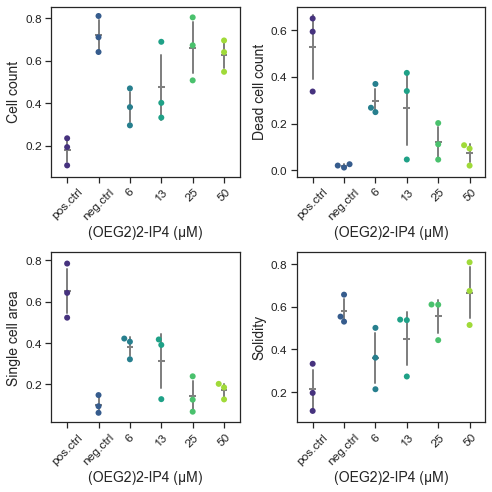

In [45]:
##triplicate: visualize primary features: count, dead cell count, single cell area, solidity

rcGraph = {"axes.spines.left" : True,
      "axes.spines.right" : True,
      "axes.spines.bottom" : True,
      "axes.spines.top" : True,
      "xtick.bottom" : True,
      "xtick.labelbottom" : True,
      "ytick.labelleft" : True,
      "ytick.left" : True}

sns.set_style("white")
plt.rcParams.update(rcGraph)

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(7,7))
sns.swarmplot(y="nuclei_count", x="cond_short", 
                 data=meanFeature_triplicate,ax=ax1,palette='viridis',size=6)
sns.pointplot(y="nuclei_count", x="cond_short", 
                 data=meanFeature_triplicate,ax=ax1,color='gray',ci='sd',join=False,errwidth=2,
             markers='_')

sns.swarmplot(y="ethd_count",x="cond_short",data=meanFeature_triplicate, color='gray',palette='viridis',ax=ax2,size=6)
sns.pointplot(y="ethd_count", x="cond_short", 
                 data=meanFeature_triplicate,ax=ax2,color='gray',ci='sd',join=False,errwidth=2,markers='_')

sns.swarmplot(y="areas", x="cond_short", data=meanFeature_triplicate,color='gray',palette='viridis',ax=ax3,size=6)
sns.pointplot(y="areas", x="cond_short", 
                 data=meanFeature_triplicate,ax=ax3,color='gray',ci='sd',join=False,errwidth=2,markers='_')

sns.swarmplot(y="solidity", x="cond_short",data=meanFeature_triplicate,color='gray',palette='viridis',ax=ax4,size=6)
sns.pointplot(y="solidity", x="cond_short", 
                 data=meanFeature_triplicate,ax=ax4,color='gray',ci='sd',join=False,errwidth=2,markers='_')

ax1.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)
ax3.tick_params(axis='y', which='major', labelsize=12)
ax4.tick_params(axis='y', which='major', labelsize=12)

ax1.tick_params(axis='x', which='major', labelsize=12,rotation=45)
ax2.tick_params(axis='x', which='major', labelsize=12,rotation=45)
ax3.tick_params(axis='x', which='major', labelsize=12,rotation=45)
ax4.tick_params(axis='x', which='major', labelsize=12,rotation=45)

ax1.set_ylabel('Cell count',fontsize=14)
#ax1.set_xlabel('Ca/P (mM)',fontsize=14)
ax1.set_xlabel('(OEG2)2-IP4 (\u03BCM)',fontsize=14)
ax2.set_ylabel('Dead cell count',fontsize=14)
#ax2.set_xlabel('Ca/P (mM)',fontsize=14)
ax2.set_xlabel('(OEG2)2-IP4 (\u03BCM)',fontsize=14)
ax3.set_ylabel('Single cell area',fontsize=14)
#ax3.set_xlabel('Ca/P (mM)',fontsize=14)
ax3.set_xlabel('(OEG2)2-IP4 (\u03BCM)',fontsize=14)
ax4.set_ylabel('Solidity',fontsize=14)
#ax4.set_xlabel('Ca/P (mM)',fontsize=14)
ax4.set_xlabel('(OEG2)2-IP4 (\u03BCM)',fontsize=14)

fig.tight_layout()

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/TriplicateResults/")
plt.savefig('primaryFeatures_N3_v4_{}.png'.format('INS3001'),bbox_inches="tight")

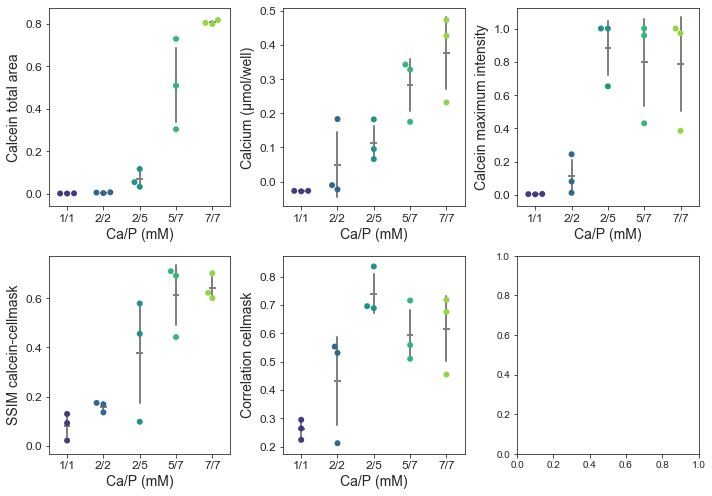

In [18]:
##triplicate CaP: visualize secondary features: calcein area, colorimetric quant.,..

#fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8))=plt.subplots(2,4,figsize=(13,7))

fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(10,7))
sns.swarmplot(y="calcein_areaTotal", x="cond_name", 
                 data=meanFeature_triplicate,ax=ax1,palette='viridis',size=6)
sns.pointplot(y="calcein_areaTotal", x="cond_name", 
                 data=meanFeature_triplicate,ax=ax1,color='gray',ci='sd',join=False,errwidth=2,
             markers='_')

sns.swarmplot(y="calcium μmol/well",x="cond_name",data=meanFeature_triplicate, color='gray',
              palette='viridis',ax=ax2,size=6)
sns.pointplot(y="calcium μmol/well", x="cond_name", 
                 data=meanFeature_triplicate,ax=ax2,color='gray',ci='sd',join=False,errwidth=2,
             markers='_')

sns.swarmplot(y="calcein_maxTotal", x="cond_name", data=meanFeature_triplicate,color='gray',palette='viridis',
              ax=ax3,size=6)
sns.pointplot(y="calcein_maxTotal", x="cond_name", 
                 data=meanFeature_triplicate,ax=ax3,color='gray',ci='sd',join=False,errwidth=2,
             markers='_')

sns.swarmplot(y="ssim_cm", x="cond_name",data=meanFeature_triplicate,color='gray',palette='viridis',ax=ax4,size=6)
sns.pointplot(y="ssim_cm", x="cond_name", 
                 data=meanFeature_triplicate,ax=ax4,color='gray',ci='sd',join=False,errwidth=2,
             markers='_')

sns.swarmplot(y="correlation_cm", x="cond_name",data=meanFeature_triplicate,color='gray',palette='viridis',
              ax=ax5,size=6)
sns.pointplot(y="correlation_cm", x="cond_name", 
                 data=meanFeature_triplicate,ax=ax5,color='gray',ci='sd',join=False,errwidth=2,
             markers='_')

ax1.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)
ax3.tick_params(axis='y', which='major', labelsize=12)
ax4.tick_params(axis='y', which='major', labelsize=12)
ax5.tick_params(axis='y', which='major', labelsize=12)


ax1.tick_params(axis='x', which='major', labelsize=12,rotation=0)
ax2.tick_params(axis='x', which='major', labelsize=12,rotation=0)
ax3.tick_params(axis='x', which='major', labelsize=12,rotation=0)
ax4.tick_params(axis='x', which='major', labelsize=12,rotation=0)
ax5.tick_params(axis='x', which='major', labelsize=12,rotation=0)


ax1.set_ylabel('Calcein total area',fontsize=14)
ax1.set_xlabel('Ca/P (mM)',fontsize=14)
ax2.set_ylabel('Calcium (\u03BCmol/well)',fontsize=14)
#ax2.set_ylabel('Calcium normalized',fontsize=14)
ax2.set_xlabel('Ca/P (mM)',fontsize=14)
ax3.set_ylabel('Calcein maximum intensity',fontsize=14)
ax3.set_xlabel('Ca/P (mM)',fontsize=14)
ax4.set_ylabel('SSIM calcein-cellmask',fontsize=14)
ax4.set_xlabel('Ca/P (mM)',fontsize=14)
ax5.set_ylabel('Correlation cellmask',fontsize=14)
ax5.set_xlabel('Ca/P (mM)',fontsize=14)


fig.tight_layout()

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/TriplicateResults/")
plt.savefig('calciumFeatures_N3_v6_{}.png'.format('CaP'),bbox_inches="tight")

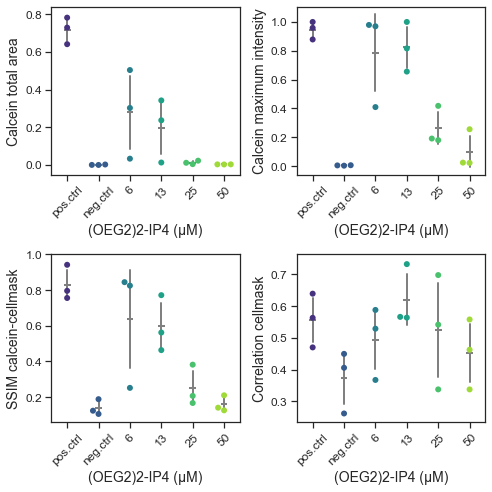

In [47]:
##triplicate INS3001: visualize secondary features: count, dead cell count, single cell area, solidity

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(7,7))

sns.swarmplot(y="calcein_areaTotal", x="cond_short", 
                 data=meanFeature_triplicate,ax=ax1,palette='viridis',size=6)
sns.pointplot(y="calcein_areaTotal", x="cond_short", 
                 data=meanFeature_triplicate,ax=ax1,color='gray',ci='sd',join=False,errwidth=2,
             markers='_')

sns.swarmplot(y="calcein_maxTotal", x="cond_short", data=meanFeature_triplicate,color='gray',palette='viridis',ax=ax2,
              size=6)
sns.pointplot(y="calcein_maxTotal", x="cond_short", 
                 data=meanFeature_triplicate,ax=ax2,color='gray',ci='sd',join=False,errwidth=2,
             markers='_')

sns.swarmplot(y="ssim_cm", x="cond_short",data=meanFeature_triplicate,color='gray',palette='viridis',ax=ax3,size=6)
sns.pointplot(y="ssim_cm", x="cond_short", 
                 data=meanFeature_triplicate,ax=ax3,color='gray',ci='sd',join=False,errwidth=2,
             markers='_')

sns.swarmplot(y="correlation_cm", x="cond_short",data=meanFeature_triplicate,color='gray',palette='viridis',ax=ax4,
              size=6)
sns.pointplot(y="correlation_cm", x="cond_short", 
                 data=meanFeature_triplicate,ax=ax4,color='gray',ci='sd',join=False,errwidth=2,
             markers='_')
#sns.swarmplot(y="homogeneity_calcein", x="cond_name",data=meanFeature_triplicate,color='gray',palette='viridis',ax=ax5,size=6)
#sns.swarmplot(y="correlation_calcein", x="cond_name",data=meanFeature_triplicate,color='gray',palette='viridis',ax=ax6,size=6)


ax1.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)
ax3.tick_params(axis='y', which='major', labelsize=12)
ax4.tick_params(axis='y', which='major', labelsize=12)

ax1.tick_params(axis='x', which='major', labelsize=12,rotation=45)
ax2.tick_params(axis='x', which='major', labelsize=12,rotation=45)
ax3.tick_params(axis='x', which='major', labelsize=12,rotation=45)
ax4.tick_params(axis='x', which='major', labelsize=12,rotation=45)


ax1.set_ylabel('Calcein total area',fontsize=14)
ax1.set_xlabel('(OEG2)2-IP4 (\u03BCM)',fontsize=14)

ax2.set_ylabel('Calcein maximum intensity',fontsize=14)
ax2.set_xlabel('(OEG2)2-IP4 (\u03BCM)',fontsize=14)

ax3.set_ylabel('SSIM calcein-cellmask',fontsize=14)
ax3.set_xlabel('(OEG2)2-IP4 (\u03BCM)',fontsize=14)

ax4.set_ylabel('Correlation cellmask',fontsize=14)
ax4.set_xlabel('(OEG2)2-IP4 (\u03BCM)',fontsize=14)



fig.tight_layout()

os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/TriplicateResults/")
plt.savefig('calciumFeatures_N3_v6_{}.png'.format('INS3001'),bbox_inches="tight")

# clustermap INS-3001

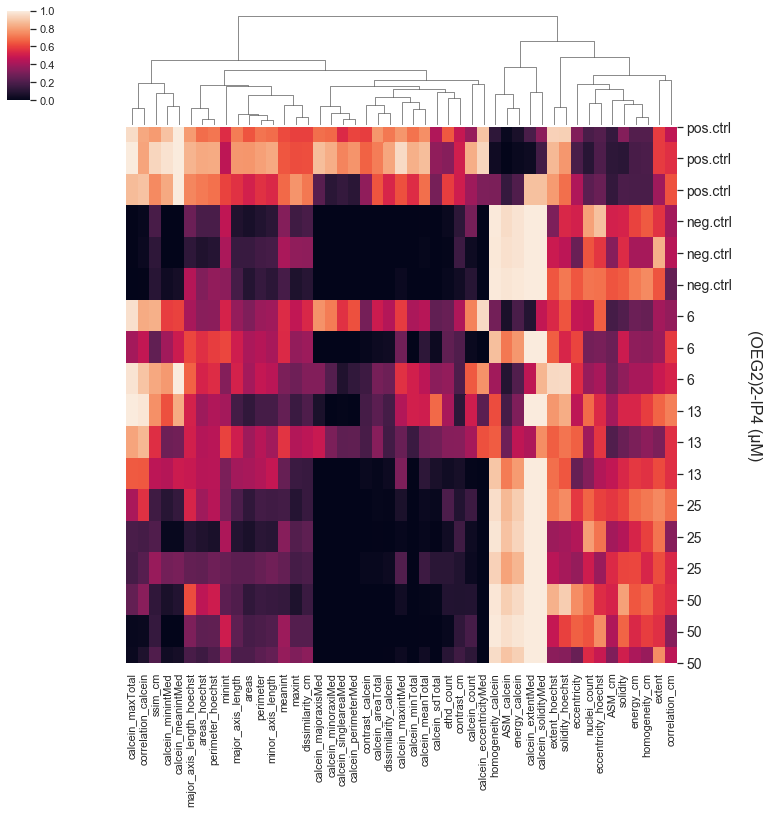

In [51]:
##clustermap of triplicate results - clustered only by feature: INS-3001
import seaborn as sns;sns.set(color_codes=True)

#depending on experiments-->drop calcium condition and rename before exporting

fig=sns.clustermap(meanFeature_triplicate.drop(['index','cond_name','cond_short','minor_axis_length_hoechst','bbox_hoechst','eulernumber','eulernumber_hoechst',
                                               'bbox_hoechst','calcein_medianTotal','calcein_eulerMed','calcium normalized'],
                                               axis=1),
                   row_cluster=False,figsize=(12,12))
fig.ax_heatmap.set_ylabel('(OEG2)2-IP4 (\u03BCM)',fontsize=16,rotation=-90,labelpad=30)

fig.ax_heatmap.set_yticklabels(meanFeature_triplicate['cond_short'], rotation = 0, fontsize = 14)
#fig.ax_heatmap.set_xticklabels(get_xticklabels(), rotation = 0, fontsize = 8)


os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/TriplicateResults/")
plt.savefig('clustermap_N3_v2_featureCluster{}.png'.format('INS3001'),bbox_inches="tight")

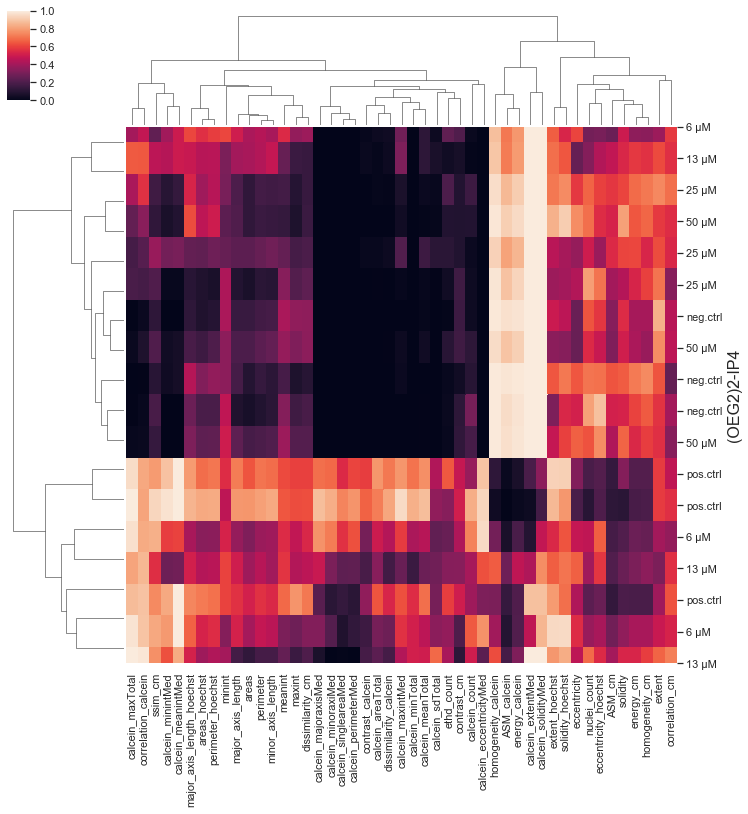

In [93]:
##clustermap of triplicate results - clustered by feature and cond
#import seaborn as sns;sns.set(color_codes=True)

meanFeature_triplicate.set_index(['cond_name'],inplace=True)
fig=sns.clustermap(meanFeature_triplicate.drop(['index','minor_axis_length_hoechst','bbox_hoechst','eulernumber','eulernumber_hoechst',
                                               'bbox_hoechst','calcein_medianTotal','calcein_eulerMed','calcium normalized'],
                                               axis=1),figsize=(12,12))
fig.ax_heatmap.set_ylabel('(OEG2)2-IP4',fontsize=16)
#fig.ax_heatmap.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 14)


os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/TriplicateResults/")
plt.savefig('clustermap_N3_v1_featureCondCluster{}.png'.format('INS3001'),bbox_inches="tight")

In [84]:
meanFeature_triplicate

,index,cond_name,nuclei_count,ethd_count,areas,major_axis_length,eccentricity,eulernumber,extent,maxint,...,energy_cm,correlation_cm,homogeneity_cm,contrast_calcein,dissimilarity_calcein,ASM_calcein,energy_calcein,correlation_calcein,homogeneity_calcein,calcium normalized
17,0,pos.ctrl,0.193168,0.650273,0.642841,0.723880,0.324343,0,0.593660,0.602804,...,0.218298,0.469863,0.216281,0.596903,0.715124,0.025669,0.070293,0.826659,0.124680,1.000000
5,0,pos.ctrl,0.106988,0.337302,0.784539,0.786327,0.193741,0,0.593641,0.627525,...,0.189343,0.563097,0.196973,0.669869,0.820545,0.005179,0.026389,0.819698,0.040934,1.000000
11,0,pos.ctrl,0.234696,0.593870,0.522887,0.569791,0.432421,0,0.398408,0.779599,...,0.193642,0.639166,0.192437,0.361031,0.536140,0.142482,0.208209,0.892390,0.316276,1.000000
4,1,neg.ctrl,0.810555,0.025794,0.063009,0.082089,0.521153,0,0.573536,0.167298,...,0.609057,0.405731,0.655374,0.000085,0.000919,0.957570,0.976596,0.022456,0.993599,-0.046180
10,1,neg.ctrl,0.640952,0.011494,0.148694,0.150914,0.271064,0,0.845561,0.362477,...,0.413583,0.449492,0.411044,0.000211,0.002112,0.971117,0.979923,0.028057,0.989914,-1.292846
16,1,neg.ctrl,0.710247,0.020036,0.094596,0.182870,0.645419,0,0.642069,0.079958,...,0.719946,0.261715,0.755403,0.000073,0.000718,0.981862,0.989396,0.007462,0.995140,-0.151095
15,2,6 μM,0.381429,0.369763,0.406682,0.526858,0.557549,0,0.495404,0.281412,...,0.416854,0.528841,0.417586,0.161363,0.278690,0.096597,0.213814,0.897365,0.399609,0.958819
3,2,6 μM,0.469594,0.267857,0.321669,0.371827,0.481556,0,0.404536,0.474747,...,0.274667,0.367330,0.265078,0.298556,0.444574,0.066635,0.193891,0.835003,0.294455,0.473422
9,2,6 μM,0.295529,0.249042,0.421959,0.509654,0.610455,0,0.387437,0.370674,...,0.356705,0.587907,0.350331,0.017795,0.041302,0.717740,0.786320,0.479854,0.883952,1.987815
12,3,13 μM,0.689046,0.417122,0.128995,0.176084,0.467783,0,0.675521,0.153686,...,0.536492,0.732289,0.594320,0.183490,0.181677,0.182081,0.320657,0.984424,0.625508,1.726518


# clustermap CaP

In [19]:
##clustermap of triplicate results - clustered only by feature: CaP
import seaborn as sns;sns.set(color_codes=True)

#depending on experiments-->drop calcium condition and rename before exporting
meanFeature_triplicate.sort_values('cond_name',inplace=True)

fig=sns.clustermap(meanFeature_triplicate.drop(['index','cond_name','minor_axis_length_hoechst','bbox_hoechst','eulernumber','eulernumber_hoechst',
                                               'bbox_hoechst','calcein_medianTotal','calcein_eulerMed','calcium \u03BCg/\u03BCL'],axis=1),
                   row_cluster=False,figsize=(12,12))
fig.ax_heatmap.set_ylabel('Calcium/Phosphate (mM)',fontsize=16,rotation=180)

fig.ax_heatmap.set_yticklabels(meanFeature_triplicate['cond_name'], rotation = 0, fontsize = 14)
#fig.ax_heatmap.set_xticklabels(get_xticklabels(), rotation = 0, fontsize = 8)


os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/TriplicateResults/")
#plt.savefig('clustermap_N3_v1_featureCluster{}.png'.format('CaP'),bbox_inches="tight")
 

KeyError: "['index'] not found in axis"

In [20]:
meanFeature_triplicate.columns

Index(['cond_name', 'nuclei_count', 'ethd_count', 'areas', 'major_axis_length',
       'eccentricity', 'eulernumber', 'extent', 'maxint', 'meanint', 'minint',
       'perimeter', 'solidity', 'minor_axis_length', 'areas_hoechst',
       'major_axis_length_hoechst', 'eccentricity_hoechst',
       'eulernumber_hoechst', 'extent_hoechst', 'perimeter_hoechst',
       'solidity_hoechst', 'minor_axis_length_hoechst', 'bbox_hoechst',
       'ssim_cm', 'calcein_count', 'calcein_maxTotal', 'calcein_minTotal',
       'calcein_meanTotal', 'calcein_medianTotal', 'calcein_sdTotal',
       'calcein_areaTotal', 'calcein_singleareaMed', 'calcein_eccentricityMed',
       'calcein_eulerMed', 'calcein_extentMed', 'calcein_perimeterMed',
       'calcein_solidityMed', 'calcein_majoraxisMed', 'calcein_minoraxiMed',
       'calcein_maxintMed', 'calcein_minintMed', 'calcein_meanintMed',
       'contrast_cm', 'dissimilarity_cm', 'ASM_cm', 'energy_cm',
       'correlation_cm', 'homogeneity_cm', 'contrast_calcein

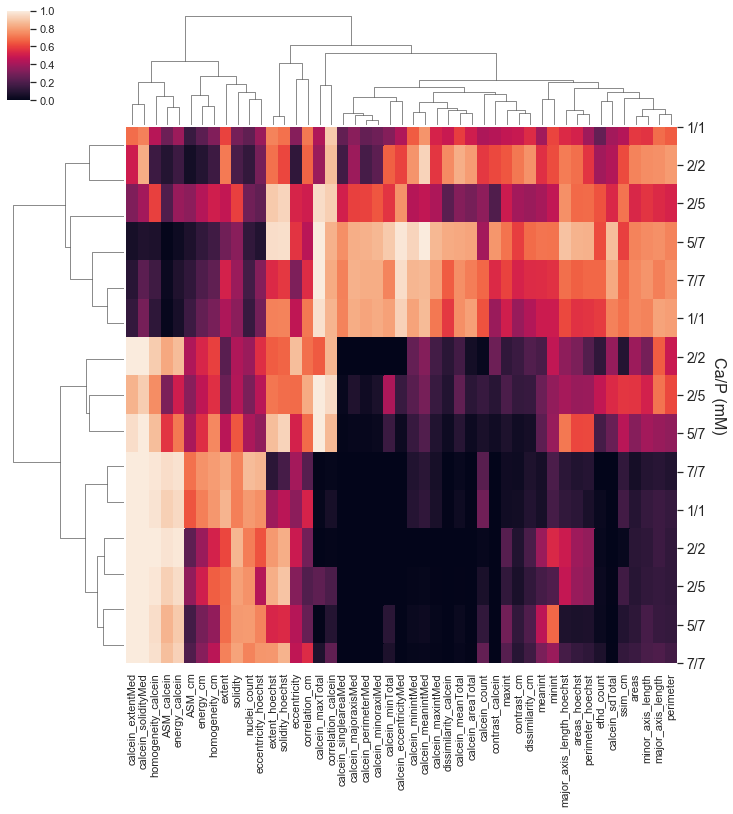

In [56]:
##clustermap of triplicate results - clustered by feature and cond

fig=sns.clustermap(meanFeature_triplicate.drop(['cond_name','minor_axis_length_hoechst','bbox_hoechst','eulernumber','eulernumber_hoechst',
                                               'bbox_hoechst','calcein_medianTotal','calcein_eulerMed','calcium \u03BCg/\u03BCL','calcium \u03BCmol/well'],
                                               axis=1),figsize=(12,12))
fig.ax_heatmap.set_ylabel('Ca/P (mM)',fontsize=16,rotation=-90,labelpad=20)
fig.ax_heatmap.set_yticklabels(meanFeature_triplicate['cond_name'], rotation = 0, fontsize = 14)


os.chdir(r"/Users/anna/Documents/PhD/CalcificationImaging/ImagingData/TriplicateResults/")
plt.savefig('clustermap_N3_v2_featureCondCluster{}.png'.format('CaP'),bbox_inches="tight")